In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [7]:
x_train[0].shape

(28, 28)

<Figure size 640x480 with 0 Axes>

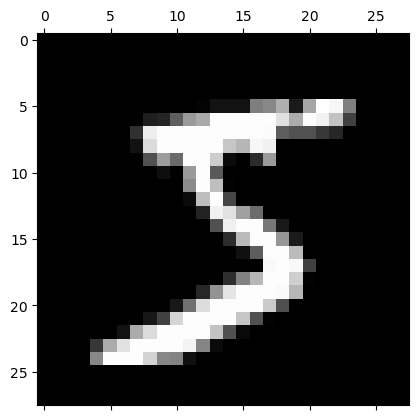

In [5]:
plt.gray()
plt.matshow(x_train[0])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
x_train_flattened=x_train.reshape(len(x_train),28*28)

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_train_flattened.shape

(60000, 784)

In [17]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [33]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')])

In [34]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2646 - accuracy: 0.9247
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1195 - accuracy: 0.9654
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0840 - accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0623 - accuracy: 0.9813
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0503 - accuracy: 0.9844


In [12]:
x_train=x_train/255
x_test=x_test/255

In [13]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [38]:
x_test=x_test/255

In [19]:
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [35]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0699 - accuracy: 0.9787


[0.06990576535463333, 0.9786999821662903]

In [25]:
y_pred=model.predict(x_test_flattened)
y_pred[0]

313/313 [==============================] - 0s 912us/step


array([1.61483642e-02, 1.87861744e-07, 4.76944782e-02, 9.51381624e-01,
       2.74131470e-03, 1.24489166e-01, 7.73210445e-07, 9.99830008e-01,
       9.02394205e-02, 6.64135337e-01], dtype=float32)

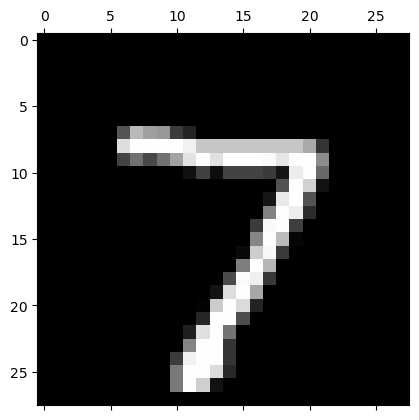

In [23]:
plt.matshow(x_test[0])

In [26]:
np.argmax(y_pred[0])

7

In [36]:
y_predicted_labels=[np.argmax(i) for i in y_pred]

In [37]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    4,    8,    2,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   5,    9,  945,   13,    8,    3,   12,    9,   23,    5],
       [   2,    0,   25,  924,    1,   19,    2,   10,   16,   11],
       [   1,    2,    3,    1,  918,    0,   12,    4,    7,   34],
       [   8,    3,    4,   34,   11,  772,   18,    9,   26,    7],
       [   9,    3,    7,    1,    7,   11,  917,    2,    1,    0],
       [   1,    6,   25,    3,    8,    0,    0,  947,    2,   36],
       [   7,   12,    9,   23,   10,   29,   10,   12,  854,    8],
       [  11,    7,    1,   10,   29,    5,    0,   24,    5,  917]])>

Text(95.72222222222221, 0.5, 'truth')

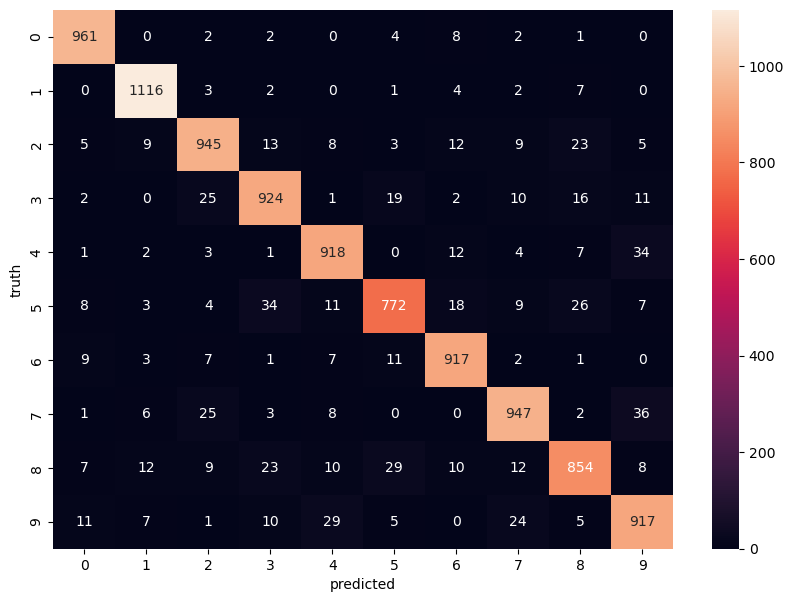

In [38]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("truth")
